<a href="https://colab.research.google.com/github/leonnmarcoo/CCADMACL_COM232_PROJECT/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

## **Import**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

## **Load the dataset**

In [17]:
df = pd.read_csv("cleaned_data.csv")

## **Understanding the Data**

In [18]:
df.head()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count
0,237000000,1,150.437577,2009.0,2787965087,162.0,7.2,11800
1,300000000,1,139.082615,2007.0,961000000,169.0,6.9,4500
2,245000000,1,107.376788,2015.0,880674609,148.0,6.3,4466
3,250000000,1,112.312950,2012.0,1084939099,165.0,7.6,9106
4,260000000,1,43.926995,2012.0,284139100,132.0,6.1,2124


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4800 non-null   int64  
 1   homepage      4800 non-null   int64  
 2   popularity    4800 non-null   float64
 3   release_date  4800 non-null   float64
 4   revenue       4800 non-null   int64  
 5   runtime       4800 non-null   float64
 6   vote_average  4800 non-null   float64
 7   vote_count    4800 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 300.1 KB


In [20]:
df.describe()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count
count,4.800000e+03,4800.000000,4800.000000,4800.000000,4.800000e+03,4800.000000,4800.000000,4800.000000
mean,2.906007e+07,0.356667,21.505569,2002.463542,8.231205e+07,106.898125,6.094458,690.646875
std,4.073029e+07,0.479065,31.822163,12.414304,1.628950e+08,22.561593,1.188366,1234.852449
min,0.000000e+00,0.000000,0.000372,1916.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,0.000000,4.682212,1999.000000,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,0.000000,12.928897,2005.000000,1.918199e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,1.000000,28.350628,2011.000000,9.293886e+07,118.000000,6.800000,737.250000
max,3.800000e+08,1.000000,875.581305,2017.000000,2.787965e+09,338.000000,10.000000,13752.000000


## **Data Visualization**

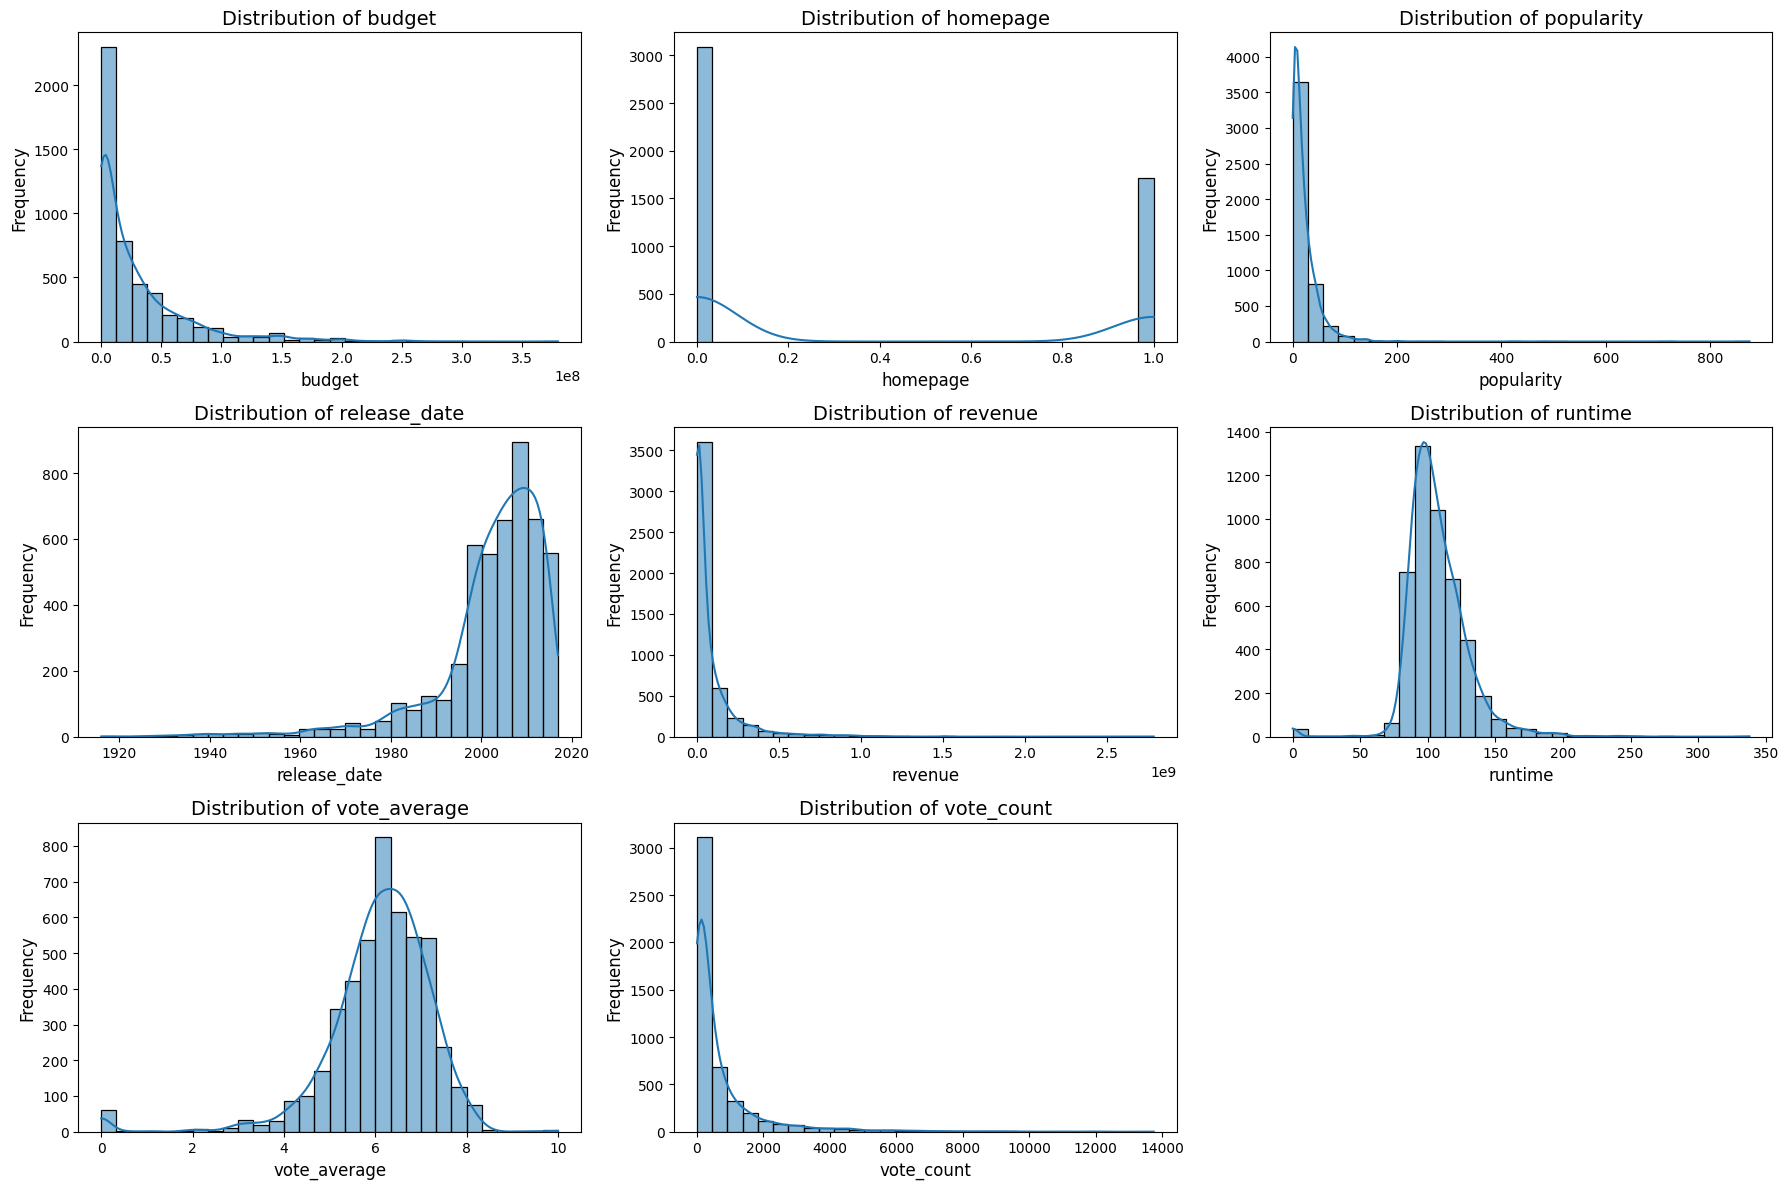

In [21]:
numerical_features = ['budget', 'homepage', 'popularity', 'release_date', 'revenue', 'runtime', 'vote_average', 'vote_count']

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

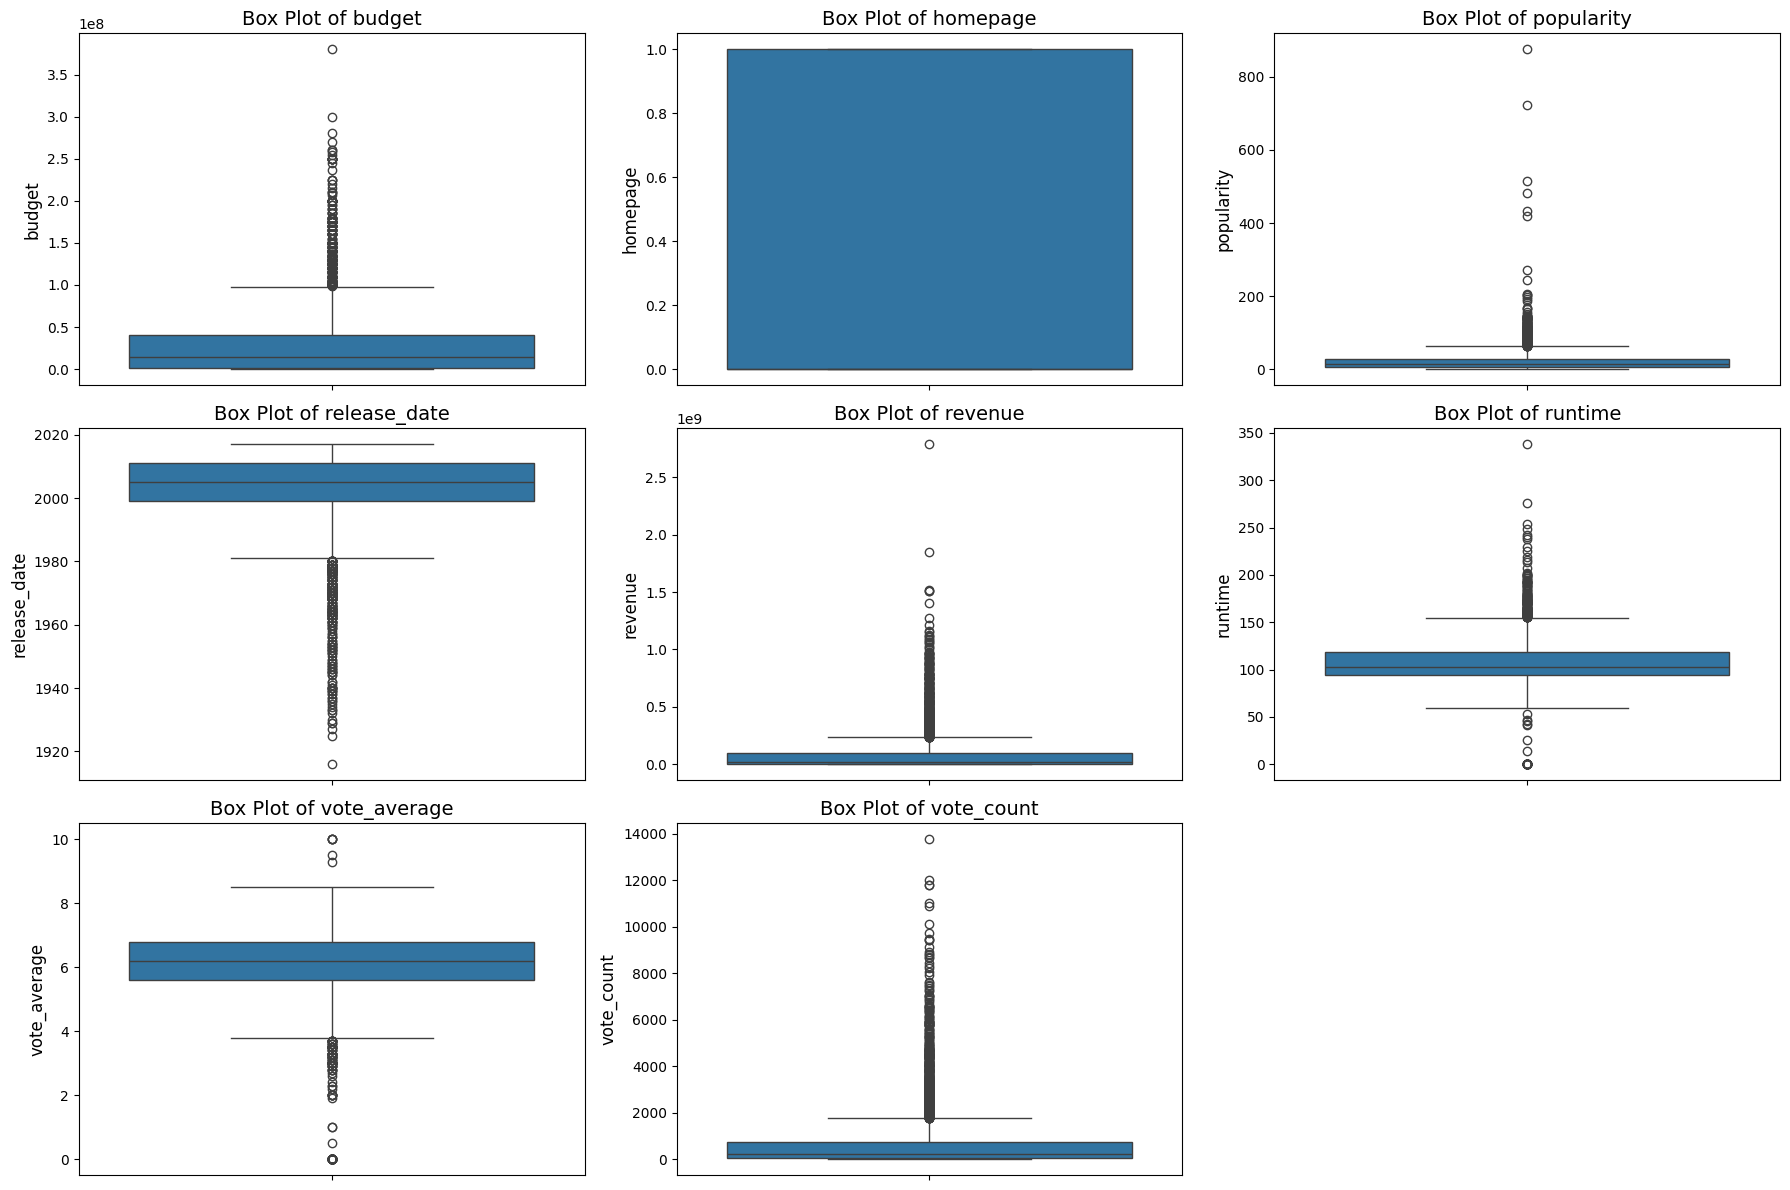

In [22]:
numerical_features = ['budget', 'homepage', 'popularity', 'release_date', 'revenue', 'runtime', 'vote_average', 'vote_count']

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

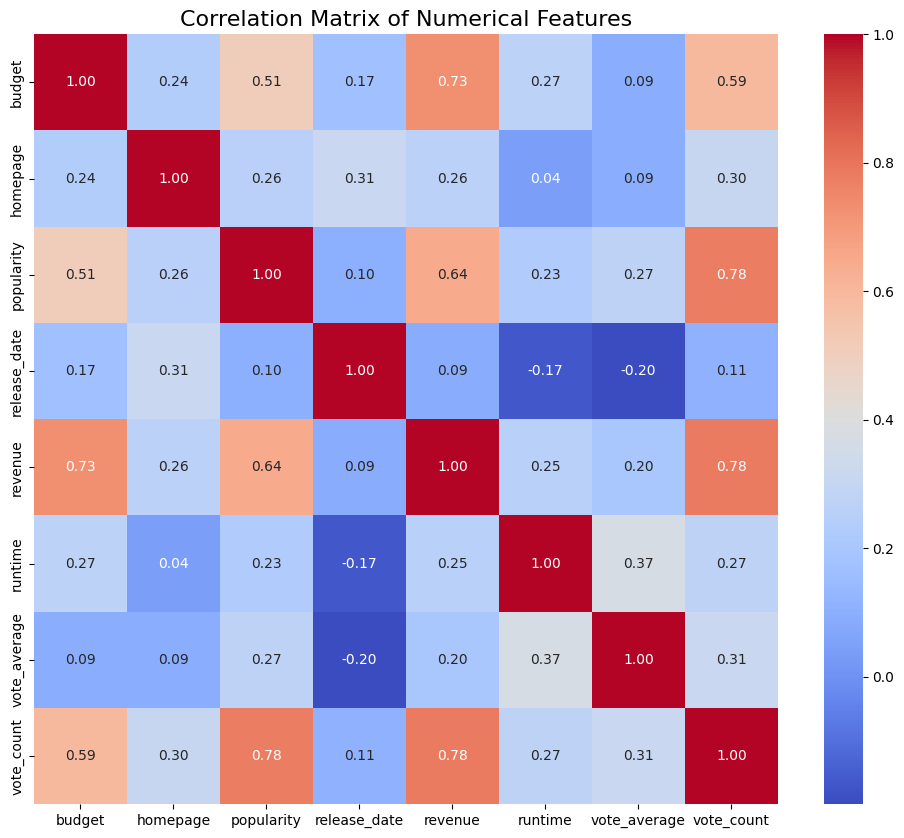

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

## **Standardizing the Data**

In [24]:
features_to_standardize = ['budget', 'homepage', 'popularity', 'revenue', 'runtime', 'vote_average']

scaler = StandardScaler()

df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

In [25]:
df.head()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count
0,5.105821,1.343033,4.052064,2009.0,16.611528,2.442541,0.930401,11800
1,6.652742,1.343033,3.695201,2007.0,5.394760,2.752835,0.677927,4500
2,5.302256,1.343033,2.698753,2015.0,4.901597,1.821953,0.172980,4466
3,5.425027,1.343033,2.853887,2012.0,6.155692,2.575524,1.267033,9106
4,5.670570,1.343033,0.704659,2012.0,1.239130,1.112709,0.004664,2124


## **Import the new Dataset**

In [26]:
df.to_csv('standardized_data.csv', index=False)